## Audio Classification Data preprocessing

In [32]:
#Reading a sample audio using librosa

In [33]:
import librosa
audio_file_path='aa/Cafe2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [34]:
print(librosa_audio_data)

[-0.00280152 -0.00414878 -0.00092604 ... -0.00222163  0.00100069
 -0.00514386]


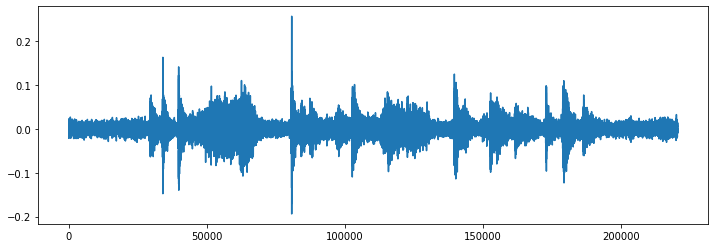

In [35]:
#Plotting the librosa audio data
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [36]:
#Clearly librosa converts the signal to mono, meaning the channel will always be 1

# Trying with Scipy

In [37]:
from scipy.io import wavfile as wav 
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [38]:
wave_audio #There are two channel here unlike in librosa

array([[-186,  -32],
       [-212,  -84],
       [-133, -122],
       ...,
       [-181, -155],
       [-392,   -6],
       [-327,  268]], dtype=int16)

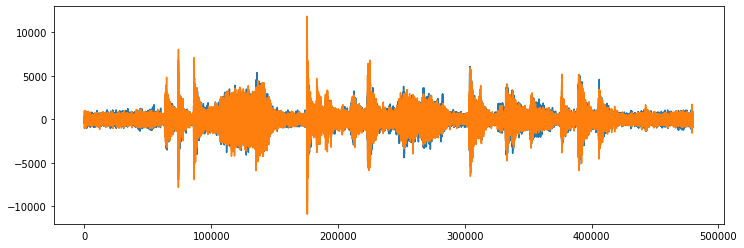

In [39]:
#Plotting the scipy audio data
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

# Extract Features

Here we will use Mel-Frequency Cepstral Coeffcients(MFCC) from the audio samples.
The MFCC summarises the frequency distribuition across the window size, so it is possible to analyse 
both the frequency and the time characteristics of the sound.These audio representation will allow us to identify features for classification

In [40]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 431)


In [41]:
mfccs #This pattern will help to identify each audio set and to which class it falls

array([[-3.37255249e+02, -3.25484100e+02, -3.27380066e+02, ...,
        -3.29441650e+02, -3.02859711e+02, -2.80105438e+02],
       [ 9.98576202e+01,  8.81604614e+01,  8.48298950e+01, ...,
         9.39126511e+01,  7.58627777e+01,  5.91551781e+01],
       [-9.46118355e+00, -6.47661734e+00, -4.83950424e+00, ...,
        -6.01460314e+00,  1.24649525e-01,  1.40833020e+00],
       ...,
       [-9.79832113e-01,  1.89224887e+00, -6.40929103e-01, ...,
         4.08865690e-01, -7.34171271e-01, -4.11899185e+00],
       [-6.67353487e+00, -4.33211994e+00, -9.14555311e-01, ...,
        -5.53911304e+00, -3.03656554e+00, -4.19473505e+00],
       [-8.98446500e-01, -3.85857773e+00, -2.08589029e+00, ...,
        -8.83492053e-01, -9.88625467e-01, -3.01897717e+00]], dtype=float32)

In [4]:
#Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='aa/audio/'
metadata=pd.read_csv('aa/meatadata/metadata.csv')
metadata.head(700)

,slice_file_name,fold,classID,class
0,Track1.wav,10,10,traffic
1,Track2.wav,10,10,traffic
2,Track3.wav,10,10,traffic
3,Track4.wav,10,10,traffic
4,Track5.wav,10,10,traffic
...,...,...,...,...
695,weather91.wav,14,14,Weather
696,weather92.wav,14,14,Weather
697,weather93.wav,14,14,Weather
698,weather94.wav,14,14,Weather


In [5]:
def features_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [6]:
import numpy as np
from tqdm import tqdm

#Now we iterate through every audio file and extract features 
#Using Mel-Frequency Cepstral Coefficient 
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])


705it [01:36,  7.32it/s]


In [7]:
#Converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-92.530716, 141.25038, -6.002736, 48.811497, ...",traffic
1,"[-83.828125, 125.963844, -7.9087915, 49.63564,...",traffic
2,"[-110.69362, 126.38782, -5.610376, 42.96607, 6...",traffic
3,"[-108.81559, 125.45174, -10.100696, 55.707764,...",traffic
4,"[-113.95262, 129.78305, 2.7528465, 47.309055, ...",traffic


In [8]:
#Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [9]:
X.shape

(705, 40)

In [10]:
y

array(['traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 'traffic', 'traffic',
       'traffic', 'traffic', 'traffic', 'traffic', 

In [11]:
y.shape

(705,)

In [12]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [13]:
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [48]:
X_train

array([[-1.89748337e+02,  1.09786736e+02, -2.21345482e+01, ...,
         1.61063027e+00,  8.44142139e-01,  5.45224071e-01],
       [-3.36035248e+02,  5.62125244e+01,  1.00598707e+01, ...,
         1.02765715e+00,  2.05935407e+00, -9.44516957e-02],
       [-1.45446899e+02,  9.90571747e+01,  9.70288658e+00, ...,
         4.15390968e-01,  4.35556024e-01, -2.32713930e-02],
       ...,
       [-1.45934647e+02,  1.04552040e+02,  1.21518269e+01, ...,
         1.45181334e+00, -2.98765421e-01,  8.92613053e-01],
       [-5.48688904e+02,  4.32715569e+01, -2.94950581e+01, ...,
        -1.29555690e+00,  3.85913849e-01, -2.60387838e-01],
       [-5.36962395e+01,  7.19993134e+01,  4.98240376e+00, ...,
         1.11994910e+00, -3.87318358e-02,  2.97677249e-01]], dtype=float32)

In [49]:
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [50]:
X_train.shape

(493, 40)

In [51]:
X_test.shape

(212, 40)

In [52]:
y_train.shape

(493, 5)

In [53]:
y_test.shape

(212, 5)

# Model Creation

In [54]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [56]:
#Number of classes
num_labels=y.shape[1]

In [57]:

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [59]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [68]:
## Traning my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0282 - accuracy: 0.9899 - val_loss: 0.3586 - val_accuracy: 0.9670

Epoch 00001: val_loss improved from inf to 0.35861, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.9980 - val_loss: 0.3290 - val_accuracy: 0.9670

Epoch 00002: val_loss improved from 0.35861 to 0.32900, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0536 - accuracy: 0.9858 - val_loss: 0.2821 - val_accuracy: 0.9717

Epoch 00003: val_loss improved from 0.32900 to 0.28210, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9777 - val_loss: 0.3223 - val_accuracy: 0.9764

Epoch 00004: val_loss did not improve from 0.28210
Epoch 5/100
16/16 [==============================] 

16/16 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.3506 - val_accuracy: 0.9764

Epoch 00042: val_loss did not improve from 0.28153
Epoch 43/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9919 - val_loss: 0.3249 - val_accuracy: 0.9764

Epoch 00043: val_loss did not improve from 0.28153
Epoch 44/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 0.9858 - val_loss: 0.2803 - val_accuracy: 0.9670

Epoch 00044: val_loss improved from 0.28153 to 0.28025, saving model to saved_models\audio_classification.hdf5
Epoch 45/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9919 - val_loss: 0.2643 - val_accuracy: 0.9717

Epoch 00045: val_loss improved from 0.28025 to 0.26433, saving model to saved_models\audio_classification.hdf5
Epoch 46/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0311 - accuracy: 0.9878 - val_loss: 0.264

16/16 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9878 - val_loss: 0.3339 - val_accuracy: 0.9717

Epoch 00083: val_loss did not improve from 0.26225
Epoch 84/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9959 - val_loss: 0.3324 - val_accuracy: 0.9717

Epoch 00084: val_loss did not improve from 0.26225
Epoch 85/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9919 - val_loss: 0.3310 - val_accuracy: 0.9717

Epoch 00085: val_loss did not improve from 0.26225
Epoch 86/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.3402 - val_accuracy: 0.9717

Epoch 00086: val_loss did not improve from 0.26225
Epoch 87/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0430 - accuracy: 0.9878 - val_loss: 0.3389 - val_accuracy: 0.9670

Epoch 00087: val_loss did not improve from 0.26225
Epoch 88/100
16/16 [=======================

In [70]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9716981053352356


In [40]:
filename="aa/Cafe2.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

array([[6.8977977e-22, 5.5348410e-16, 1.0000000e+00, 1.0107999e-23,
        1.0148801e-15]], dtype=float32)

In [41]:
metadata['class'].unique()

array(['traffic', 'kitchen_noise', 'Public_Places', 'Music', 'Weather'],
      dtype=object)

In [42]:
prediction_feature.shape

(1, 40)

In [43]:
X_test[1]

array([-7.98374268e+02,  1.82163239e+01,  1.12315445e+01,  2.36323757e+01,
        1.29597163e+00,  1.34421406e+01, -2.82051134e+00,  9.78531551e+00,
        7.77143538e-02,  1.40940018e+01,  6.63161230e+00,  1.21080437e+01,
        4.37846041e+00,  9.83751106e+00,  3.71657991e+00,  8.67768192e+00,
       -9.40593421e-01,  3.95721972e-01,  3.74048185e+00,  8.60252762e+00,
        4.80577326e+00,  8.79722595e+00,  3.40701008e+00,  4.71083736e+00,
        4.51779270e+00,  2.93341684e+00,  7.18265235e-01,  7.75560662e-02,
       -8.18776786e-01,  2.10768491e-01,  1.68807060e-02,  4.91090231e-02,
        1.21041501e+00,  2.09937644e+00,  1.34447455e+00,  5.89766979e-01,
        5.23949564e-02,  1.02540004e+00,  1.36954737e+00,  7.37064660e-01],
      dtype=float32)

In [44]:
model.predict(X_test)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.46322984e-07, 9.99998927e-01, 8.06279876e-10, 6.72992662e-10,
        7.26894243e-08],
       [7.64200339e-32, 1.01069190e-23, 1.00000000e+00, 1.27417618e-34,
        4.10621665e-23],
       [9.50074511e-36, 1.21821871e-26, 1.00000000e+00, 0.00000000e+00,
        1.62099792e-26],
       [2.07538265e-04, 9.99650240e-01, 3.12742704e-05, 5.30822308e-06,
        1.05620456e-04],
       [2.07818630e-06, 9.99997973e-01, 1.73853362e-10, 1.39993639e-09,
        4.42053611e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [0.00000000e+00, 7.60264156e-30, 1.00000000e+00, 0.00000000e+00,
        1.69388440e-28],
       [1.00000000e+00, 0.0000

# Testing Some Test Audio Data

Steps
   
   Preprocess the new audio data
   Predict the classes
   Invere transform your predicted label

In [45]:
filename="aa/Cafe2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.7841428e+02  9.1080521e+01 -2.3429281e+01  2.8106266e+01
 -8.1120396e+00  2.4121393e+01 -1.8102072e+01  1.4850199e+01
 -1.4477909e+01  1.2699647e+01 -1.2728753e+01  6.0128255e+00
 -1.1082491e+01  9.3488255e+00 -1.4428706e+01  4.4992199e+00
 -1.0263915e+01  1.8961688e+00 -9.6534538e+00 -7.9272911e-02
 -1.3202837e+01  4.4535944e-01 -6.4064260e+00 -2.0433255e-01
 -7.5248547e+00 -2.2044030e-01 -5.0520372e+00 -1.0515805e+00
 -6.3642101e+00 -1.6922156e+00 -5.9459457e+00 -1.2031181e+00
 -5.6174040e+00 -1.0454549e+00 -3.7804780e+00 -6.2567931e-01
 -3.9870903e+00 -3.1427963e+00 -2.7001908e+00 -1.2351220e+00]
[[-2.7841428e+02  9.1080521e+01 -2.3429281e+01  2.8106266e+01
  -8.1120396e+00  2.4121393e+01 -1.8102072e+01  1.4850199e+01
  -1.4477909e+01  1.2699647e+01 -1.2728753e+01  6.0128255e+00
  -1.1082491e+01  9.3488255e+00 -1.4428706e+01  4.4992199e+00
  -1.0263915e+01  1.8961688e+00 -9.6534538e+00 -7.9272911e-02
  -1.3202837e+01  4.4535944e-01 -6.4064260e+00 -2.0433255e-01
  -7.5248547e+00 

ValueError: y should be a 1d array, got an array of shape (1, 5) instead.